In [1]:
import os
data_dir = 'C:\\School\\Anaconda\\CNNActivity'

In [2]:
os.listdir(data_dir)

['new_sample', 'test', 'train']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib.image import imread

In [5]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [7]:
os.listdir(train_path+'glacier')[0]

'10.jpg'

In [8]:
glacier1 = train_path + '\\glacier\\' + '10.jpg'

In [9]:
glacier1_img = imread(glacier1)

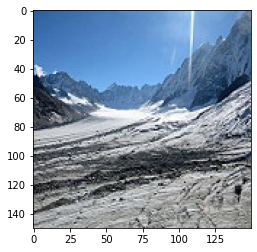

In [10]:
plt.imshow(glacier1_img)

In [11]:
os.listdir(train_path+'buildings')[0]

'0.jpg'

In [12]:
buildings = train_path + '\\buildings\\' + '0.jpg'

In [13]:
buildings_img = imread(buildings)

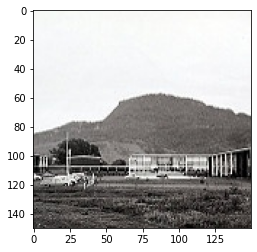

In [14]:
plt.imshow(buildings_img)

In [15]:
os.listdir(train_path+'forest')[0]

'10007.jpg'

In [16]:
forest = train_path + '\\forest\\' + '10007.jpg'

In [17]:
forest_img = imread(forest)

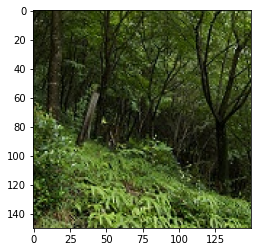

In [18]:
plt.imshow(forest_img)

In [19]:
os.listdir(train_path+'mountain')[0]

'10000.jpg'

In [20]:
mountain = train_path + '\\mountain\\' + '10000.jpg'

In [21]:
mountain_img = imread(mountain)

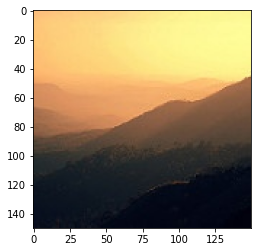

In [22]:
plt.imshow(mountain_img)

In [23]:
os.listdir(train_path+'sea')[0]

'1.jpg'

In [24]:
sea = train_path + '\\sea\\' + '1.jpg'

In [25]:
sea_img = imread(sea)

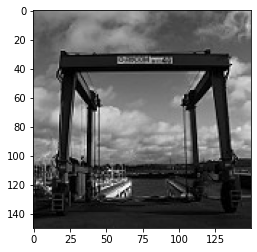

In [26]:
plt.imshow(sea_img)

In [27]:
os.listdir(train_path+'street')[0]

'1000.jpg'

In [28]:
street = train_path + '\\street\\' + '1000.jpg'

In [29]:
street_img = imread(street)

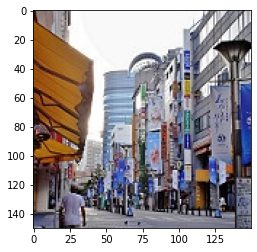

In [30]:
plt.imshow(street_img)

In [31]:
buildings_img.shape

(150, 150, 3)

In [32]:
forest_img.shape

(150, 150, 3)

In [33]:
glacier1_img.shape

(150, 150, 3)

In [34]:
sea_img.shape

(150, 150, 3)

In [35]:
mountain_img.shape

(150, 150, 3)

In [36]:
street_img.shape

(150, 150, 3)

In [37]:
# Get the dimensions of the image
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'\\street'):
    if image_filename != 'Thumbs.db':
        img = imread(train_path+'\\street'+'\\'+image_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [38]:
np.mean(dim1)

149.98446683459278

In [39]:
np.mean(dim2)

150.0

## Data Preparation

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest', # Fill in missing pixels with the nearest filled value
                               rescale = 1/255
                              )

In [62]:
image_gen.flow_from_directory(train_path)

Found 14034 images belonging to 6 classes.


In [63]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 6 classes.


In [60]:
from PIL import Image
def create_dataset_PIL(train_path):
    
    img_data_train=[]
    class_name_train=[]
    for dir1 in os.listdir(train_path):
        for file in os.listdir(os.path.join(train_path, dir1)):
       
            image_path= os.path.join(train_path, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(150,150,3))
            image = image.astype('float32')
            image /= 255  
            img_data_train.append(image)
            class_name_train.append(dir1)
    return img_data_train , class_name_train     

In [61]:
img_data_train, class_name_train = create_dataset_PIL(train_path)

In [62]:
img_data_train[2]

array([[[0.5137255 , 0.7607843 , 0.96862745],
        [0.5137255 , 0.7607843 , 0.96862745],
        [0.5137255 , 0.7607843 , 0.9607843 ],
        ...,
        [0.63529414, 0.8509804 , 0.92941177],
        [0.64705884, 0.8509804 , 0.93333334],
        [0.6509804 , 0.85490197, 0.9372549 ]],

       [[0.5137255 , 0.7607843 , 0.96862745],
        [0.5137255 , 0.7607843 , 0.9607843 ],
        [0.5137255 , 0.7607843 , 0.9607843 ],
        ...,
        [0.6509804 , 0.85490197, 0.9372549 ],
        [0.65882355, 0.85882354, 0.9411765 ],
        [0.6509804 , 0.8509804 , 0.93333334]],

       [[0.50980395, 0.75686276, 0.95686275],
        [0.50980395, 0.75686276, 0.95686275],
        [0.5137255 , 0.75686276, 0.95686275],
        ...,
        [0.6666667 , 0.85490197, 0.9411765 ],
        [0.67058825, 0.85882354, 0.9372549 ],
        [0.6666667 , 0.85490197, 0.93333334]],

       ...,

       [[0.67058825, 0.67058825, 0.6392157 ],
        [0.65882355, 0.65882355, 0.61960787],
        [0.64705884, 0

In [63]:
target_dict={k: v for v, k in enumerate(np.unique(class_name_train))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [64]:
target_train=  [target_dict[class_name_train[i]] for i in range(len(class_name_train))]

In [106]:
target_train[152]

0

In [66]:
from PIL import Image
def create_dataset_PIL(test_path):
    
    img_data_val=[]
    class_name_val=[]
    for dir1 in os.listdir(test_path):
        for file in os.listdir(os.path.join(test_path, dir1)):
       
            image_path= os.path.join(test_path, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(150,150,3))
            image = image.astype('float32')
            image = image/255  
            img_data_val.append(image)
            class_name_val.append(dir1)
    return img_data_val , class_name_val 

In [67]:
img_data_val, class_name_val = create_dataset_PIL(test_path)

In [68]:
target_dict={k: v for v, k in enumerate(np.unique(class_name_val))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [69]:
target_test=  [target_dict[class_name_val[i]] for i in range(len(class_name_val))]

In [70]:
from tensorflow.keras.utils import to_categorical

In [71]:
img_cat_val = to_categorical(img_data_val)

In [92]:
target_cat_val = to_categorical(target_test)

In [81]:
target_cat_test[5]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
target_cat_train = to_categorical(target_train)

## Building the Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation

In [65]:
image_shape = (150,150,3)

In [77]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3),
                 input_shape=image_shape, 
                 activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience = 1.5)

## Model Training

In [80]:
BS = 16

In [81]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=BS,
                                                class_mode='sparse')

Found 14034 images belonging to 6 classes.


In [82]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=BS,
                                               class_mode='sparse',
                                               shuffle=False)

Found 3000 images belonging to 6 classes.


In [83]:
train_image_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [84]:
results = model.fit_generator(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])
                   

Epoch 1/20
878/878 [==============================] - 358s 408ms/step - loss: 1.0479 - accuracy: 0.5889 - val_loss: 0.9426 - val_accuracy: 0.6367
Epoch 2/20
878/878 [==============================] - 395s 450ms/step - loss: 0.7580 - accuracy: 0.7173 - val_loss: 0.8564 - val_accuracy: 0.6797
Epoch 3/20
 36/878 [>.............................] - ETA: 6:15 - loss: 0.6728 - accuracy: 0.7361

KeyboardInterrupt: 

In [ ]:
model.save('SavedModelCNNActivity')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('SavedModelCNNActivity')

## Model Evaluation

In [ ]:
pred_probabilities = model.predict_generator(test_image_gen)
pred = np.argmax(pred_probabilities, axis = 1)

In [ ]:
pred

In [ ]:
train_image_gen.class_indices

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,pred))

In [ ]:
confusion_matrix(test_image_gen.classes,pred)

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics

## Predicting out-of-sample images

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
dir_path = 'C:\\School\\Anaconda\\CNNActivity\\new_sample'

In [ ]:
os.listdir(dir_path)[100]

In [ ]:
sample = dir_path + '\\14.jpg'

In [ ]:
sample = image.load_img(sample,target_size=image_shape)

In [ ]:
sample

In [ ]:
sample_img = image.img_to_array(sample)

In [ ]:
sample_img.shape

In [ ]:
sample_img = sample_img.reshape(1,150,150,3)

In [ ]:
predicted = model.predict(sample_img)

In [ ]:
np.argmax(predicted)

In [ ]:
plt.figure(figsize=(20,20))

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    img = os.path.join(dir_path, os.listdir(dir_path)[i])
    img = image.load_img(img)
    img_array = image.img_to_array(img)     
    img_array = img_array
    input_img = np.expand_dims(img_array, axis=0)
    prediction = model.predict(input_img)
    label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')